In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv("C:\\Users\\sheik\\Downloads\\HIV_dataset.csv")
print(train.shape)

(698, 10)


In [4]:
train.head(5)

,Age,Marital Staus,STD,Educational Background,HIV TEST IN PAST YEAR,AIDS education,Places of seeking sex partners,SEXUAL ORIENTATION,Drug- taking,Result
0,22,UnMarried,0,College Degree,1,0,Bar,Heterosexual,1,1
1,20,UnMarried,0,College Degree,0,1,0ne,Heterosexual,0,0
2,23,Married,1,College Degree,0,1,0ne,Bisexual,0,0
3,24,Married,0,College Degree,1,1,Park,Heterosexual,1,1
4,18,UnMarried,1,Senior High School,1,0,Internet,Heterosexual,1,1


In [5]:
#checking for missing data
NAs = pd.concat([train.isnull().sum()], axis = 1, keys=["Train"])
NAs[NAs.sum(axis=1) > 0]

,Train


In [6]:
#filling missing values with mode
train["Places of seeking sex partners"] = train["Places of seeking sex partners"].fillna(train["Places of seeking sex partners"].mode()[0])

In [7]:
#Getting Dummies(variables that represent categorical data) from all other categorical vars
for col in train.dtypes[train.dtypes == "object"].index:
    for_dummy = train.pop(col)
    train = pd.concat([train, pd.get_dummies(for_dummy, prefix=col)], axis=1)
train.head()

,Age,STD,HIV TEST IN PAST YEAR,AIDS education,Drug- taking,Result,Marital Staus_Cohabiting,Marital Staus_Divorced,Marital Staus_Married,Marital Staus_UnMarried,...,Educational Background_Senior High School,Places of seeking sex partners_0ne,Places of seeking sex partners_Bar,Places of seeking sex partners_Internet,Places of seeking sex partners_Others,Places of seeking sex partners_Park,Places of seeking sex partners_Public Bath,SEXUAL ORIENTATION_Bisexual,SEXUAL ORIENTATION_Heterosexual,SEXUAL ORIENTATION_Homosexual
0,22,0,1,0,1,1,False,False,False,True,...,False,False,True,False,False,False,False,False,True,False
1,20,0,0,1,0,0,False,False,False,True,...,False,True,False,False,False,False,False,False,True,False
2,23,1,0,1,0,0,False,False,True,False,...,False,True,False,False,False,False,False,True,False,False
3,24,0,1,1,1,1,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
4,18,1,1,0,1,1,False,False,False,True,...,True,False,False,True,False,False,False,False,True,False


In [8]:
labels = train.pop("Result")

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train, labels, test_size=0.25)

In [10]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [11]:
y_pred = rf.predict(x_test)

In [12]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.960096656217346

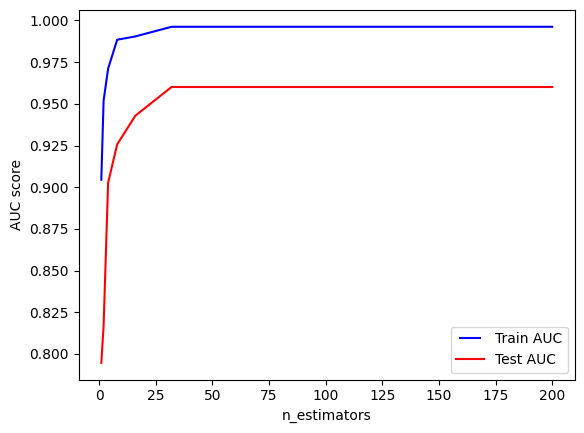

In [13]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200] 
train_results = []
test_results = []
for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
    rf.fit(x_train, y_train)
    train_pred = rf. predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate) 
    test_results.append(roc_auc)


from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, "b", label="Train AUC")
line2, = plt.plot(n_estimators, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.show()

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [15]:
# Calculate the overall accuracy and confusion matrix
overall_accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [16]:
print("Overall Accuracy:", overall_accuracy)
print("Confusion Matrix:\n", conf_matrix)

Overall Accuracy: 0.96
Confusion Matrix:
 [[83  5]
 [ 2 85]]


In [17]:
# Class-wise User Accuracy, Producer Accuracy, and F1 Score
class_report = classification_report(y_test, y_pred, output_dict=True)
for label, metrics in class_report.items():
    if isinstance(metrics, dict):
        print(f"Class {label} - User Accuracy (Precision): {metrics['precision']:.2f}, "
              f"Producer Accuracy (Recall): {metrics['recall']:.2f}, "
              f"F1 Score: {metrics['f1-score']:.2f}")

Class 0 - User Accuracy (Precision): 0.98, Producer Accuracy (Recall): 0.94, F1 Score: 0.96
Class 1 - User Accuracy (Precision): 0.94, Producer Accuracy (Recall): 0.98, F1 Score: 0.96
Class macro avg - User Accuracy (Precision): 0.96, Producer Accuracy (Recall): 0.96, F1 Score: 0.96
Class weighted avg - User Accuracy (Precision): 0.96, Producer Accuracy (Recall): 0.96, F1 Score: 0.96
